In [16]:
from sklearn.datasets import make_friedman1
#feature_extraction
# model _selection
from sklearn.feature_selection import RFE # recursive features eliminate ( 제거) 재귀적 계산으로 변수 제거
from sklearn.svm import SVR # support vector regrssor
x,y = make_friedman1(n_samples= 50 , n_features= 10 , random_state = 0) # 50 x 10 
# SVM은 고차원을 좋아함 > XOR 문제를 고차원으로해결
# POLY = Polynomial
# rbf 방사형 함수
estimator =SVR(kernel='linear') # 선형 (linear,poly,rbf,sigmoid)
selector = RFE(estimator, 5, step=1) # 변수 5개 남기고 제거 자동으로 변수선택
selector = selector.fit(x,y) 
print(selector.support_)
print(selector.ranking_)
print(selector.n_features_)


[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]
5


In [17]:
type(selector)

sklearn.feature_selection.rfe.RFE

In [18]:
print(selector.predict(x)-y) # 오차값
MSE = sum((selector.predict(x)-y)**2)/50
MSE

[-1.69902845 -2.79542068  1.94390124  1.07558198  2.6534535  -2.62179791
  5.51989507 -5.58370939 -2.78286736 -3.0592759  -0.30609224 -1.19360287
 -4.99205339 -3.10605401 -2.17419405  0.1056724  -2.42551818  3.84075279
  4.20689025 -0.31242916  1.24453339  1.71599165 -3.67325733  5.36041805
  4.7485667  -2.19288008 -2.16758485  2.89354974  1.8148168   3.65635389
  0.95460893 -0.08250305  0.10017767 -2.5617331   4.75055783  5.19629532
  2.5790045  -0.57598316 -4.93496426  2.53109964 -6.37444442  1.61369407
  8.98444876 -0.10035544 -1.86204848 -0.77977276  1.87672799 -2.67462797
  1.99958628 -0.09982201]


10.577977002630696

In [19]:
# tree : variables importance
PCA : 고유값 : 분산 크기에 따라 정렬

SyntaxError: invalid syntax (<ipython-input-19-76f90340a7cf>, line 2)

In [20]:
sample = ['problem of evil','evil queen', 'horizon problem']


In [21]:
from sklearn.feature_extraction.text import CountVectorizer # 특성추출
# scipy.sparse.csr.csr_matrix : 희소하다. > 저장방식이 다름
vec = CountVectorizer()
x = vec.fit_transform(sample) # fit : unique 한 단어를 학습 > transform(카운트)
print(type(x))
x

<class 'scipy.sparse.csr.csr_matrix'>


<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [22]:
import pandas as pd 
pd.DataFrame(x.toarray(),columns = vec.get_feature_names()) # text 마이징


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [23]:
a = vec.vocabulary_

In [24]:
# text frequency and inverse document frequency
# 
from sklearn.feature_extraction.text import TfidfVectorizer
vec =TfidfVectorizer()
x = vec.fit_transform(sample) # 단어의 중요도를 고려해서 평가 : 특징을 계산한 것이 더 정확하다
pd.DataFrame(x.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


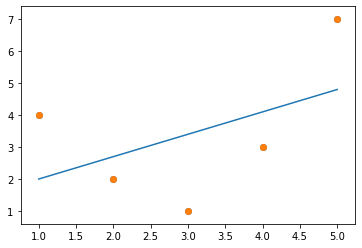

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)
# LinearRegression 을 이용해서 선형회귀 하시오
# 열데이터로 입력
x = x[:,np.newaxis] # 2차원으로 변경
    
model = LinearRegression().fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x,yfit)


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False) # 3차원
x2 = poly.fit_transform(x)

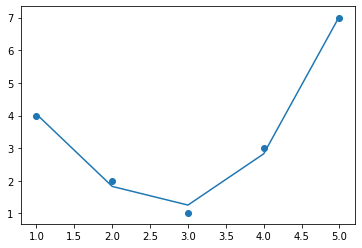

In [27]:
model = LinearRegression().fit(x2,y)
yfit = model.predict(x2)
plt.scatter(x,y)
plt.plot(x,yfit)

In [28]:
from numpy import nan 
x = np.array([[nan,0,3],
            [3 ,7 ,9],
             [3 ,5 ,2],
             [4, nan,6],
             [8,8,1]])
             
             
y= np.array([14,16,-1,8,-5])

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean') 
imp_mean.fit(x)
x= imp_mean.transform(x)

model = LinearRegression().fit(x,y)
model.predict(x)

x            

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [29]:
#chaining: 
    = Simplmputer
    = PolynomialFeatures
#필요한 이유
    -train /validation/test

IndentationError: unexpected indent (<ipython-input-29-3a529d9eefcf>, line 2)

In [30]:
# 위의 선형회귀를 비선형 회귀로 변경하시오
# simpleimputer , polynomialFeaetures , linearregression >   - 파이프 라인
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

model.fit(x,y)
print(x)
print(y)
print(model.predict(x))




[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]
[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


In [31]:
model2 = make_pipeline(SimpleImputer(strategy='mean'),PolynomialFeatures(degree=2))

In [32]:
model2.fit_transform(x)

array([[ 1.  ,  4.5 ,  0.  ,  3.  , 20.25,  0.  , 13.5 ,  0.  ,  0.  ,
         9.  ],
       [ 1.  ,  3.  ,  7.  ,  9.  ,  9.  , 21.  , 27.  , 49.  , 63.  ,
        81.  ],
       [ 1.  ,  3.  ,  5.  ,  2.  ,  9.  , 15.  ,  6.  , 25.  , 10.  ,
         4.  ],
       [ 1.  ,  4.  ,  5.  ,  6.  , 16.  , 20.  , 24.  , 25.  , 30.  ,
        36.  ],
       [ 1.  ,  8.  ,  8.  ,  1.  , 64.  , 64.  ,  8.  , 64.  ,  8.  ,
         1.  ]])

In [37]:
# GridSearchCV

import pandas as pd

import seaborn as sns

import pprint

import time

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC #support vector classifier

from sklearn.model_selection import GridSearchCV

 

winedf = pd.read_csv('winequality-red.csv', sep=";")

print(winedf.head(3))

X=winedf.drop(['quality'],axis=1) # 분류문제 : target

Y=winedf['quality']

steps=[('scaler',StandardScaler()), ('SVM',SVC())] # 파라미터

pipeline = Pipeline(steps) # 클래스 인스턴스

# 5x2 10 가지 파라미터
#parameters = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
parameters = {'SVM__C':[1,5,10,15,20], 'SVM__gamma':[0.02,0.1,0.5]}

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 

                                                    random_state=30,stratify=Y)

grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

grid.fit(X_train,y_train)

print("score = %3.2f" %(grid.score(X_test,y_test))) # 평가 score = 0.67

print(grid.best_params_) # {'SVM__C': 10,'SVM__gamma':0.1}

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score = 0.66
{'SVM__C': 5, 'SVM__gamma': 0.5}


In [38]:
grid.best_score_

0.6411258795934324

In [39]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
# Tree :Binary tree ( 정렬된 데이터 저장 ) > dicision tree(의사결정)
-통계학 : 독립성, 선형성 , 등분산성, 정규성 : p-value 확률값 , 표본을 뽑아서         
-비모수 : 추정기능이없음
        -데이터 전체 데이터가 학습에 참여
-시각화 기능 ,white box
- 불안정하고 과적합하는 경향이 있지만 장점이 있음 
-DT -> RF -> Ada Boost(약한 모델 > 강한 모델 : 가중치를 부여) > Gradient Boost
- Classifier & Regressor 집단회귀 
- 분리기준 : 불순도 - 점점작아지는 방향으로 나눔 > 정보 기반학습
        -나누었을때 더 복잡해 진다면 나누면안됨
        -척도 : jini지수 , enthropy 지수
        -가지치기 (pruning)

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt 
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()


[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

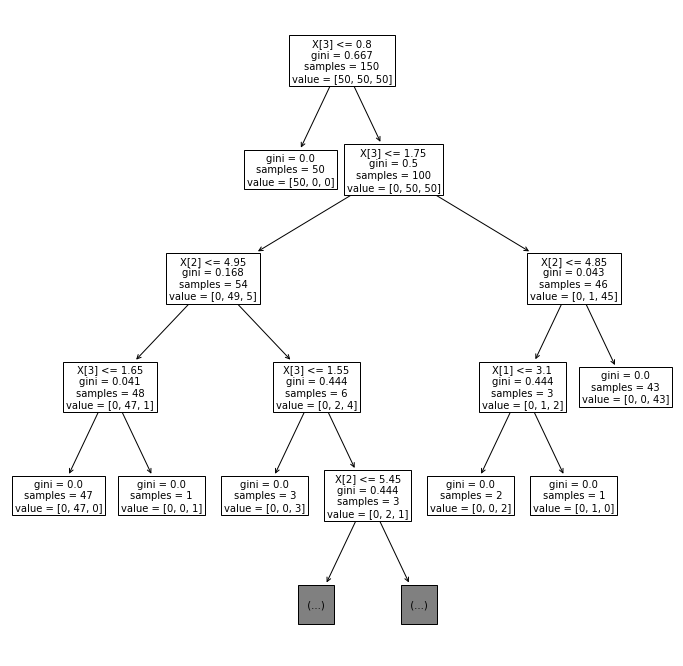

In [46]:
fig,ax = plt.subplots(figsize=(12,12))
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf,max_depth=4,fontsize=10)

In [47]:
cross_val_score(clf,iris.data,iris.target , cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [48]:
clf.get_depth()

5

In [50]:
print(clf.get_n_leaves()) # 말단 노드가 9개 

9


In [53]:
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=1000,n_features=3, n_redundant=0)


In [ ]:
# dicision tree 모델을 생성하고 예측후 실제값과 예측한 값의 평균을 출력

In [64]:
clf.fit(x,y)
predict = clf.predict(x)
print(predict.mean())
print(y.mean())



0.5
0.5


In [69]:
x = iris.data[:,2:]
y= iris.target
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state= 42)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [74]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file='./images/iris_tree.dot', feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
               class_names = iris.target_names,
               rounded =True,
               filled =True)

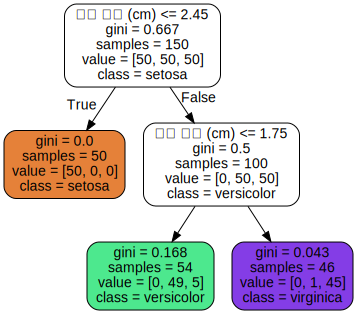

In [92]:
import graphviz
with open("./images/iris_tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='iris_tree',directory='./images', cleanup=True)
dot

In [95]:
1 - (0/54) ** 2 - (49/54) ** 2 - (5/54) ** 2


0.1680384087791495

In [ ]:
불순도 지니지수

In [88]:
1 - (0/46) ** 2 - (1/46) **2 - (45/46) ** 2

0.04253308128544431

In [ ]:
불순도 엔트로피

In [94]:
import math 
-(49/54) * math.log2(49/54) - (5/54) * math.log2(5/54)

0.44506485705083865

In [ ]:
# Tree 의 규제 (Regulization) - 과적합 방지 목적
- min_samples_split : 노드의 최소한의 개수되어야 나눔
_ min_samples_leaf : 리프 노드가 가져야 하는 최소 샘플 수 
- max_leaf_nodes : 리프 노드의 최대개수
- max_features : 각 노드에서 분할을 할때 사용할 특성 
- max_depth : 깊이를 제한 

In [104]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14) 
        
        



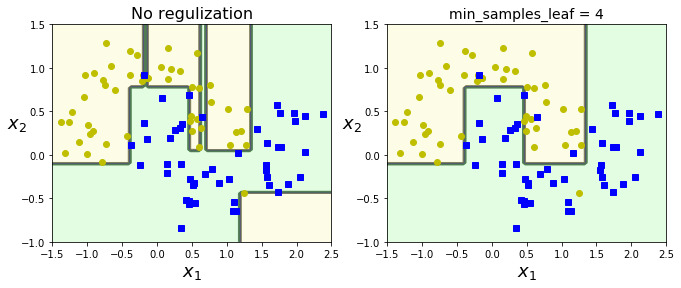

In [105]:
from sklearn.datasets import make_moons 

Xm , ym = make_moons(n_samples = 100 , noise = 0.25, random_state =53)

deep_tree_clf1 = tree.DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = tree.DecisionTreeClassifier(min_samples_leaf= 4 , random_state = 42) #leaf 가 최소 4개이상
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1 , Xm, ym , axes=[-1.5,2.5,-1,1.5], iris =False)
plt.title("No regulization", fontsize= 16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2 , Xm, ym , axes=[-1.5,2.5,-1,1.5], iris =False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf),fontsize=14)
plt.show()

In [ ]:
# Ensemble 학습 ( 연속형 : 평균 , 범주형 : 투표 (홀수))
- bootstrap > bagging(RandomForest) > boost(가중치, 오차) > voting(어러개의 모델) > stacking
- stacking (모델에서 나온 결과를 모델에 넣음)

In [169]:
from sklearn.datasets import make_classification

x,y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy:	 0.998


Text(0.5, 1.0, '특성중요도')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current

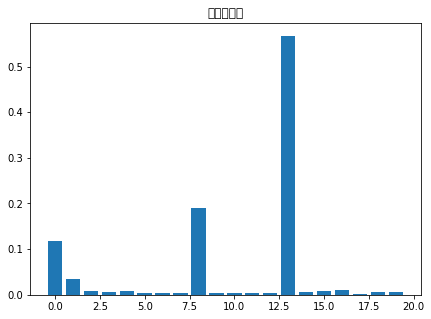

In [170]:
print('Accuracy:\t',(y == rf.predict(x)).mean())
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('특성중요도')

In [171]:
print("종속변수갯수",rf.n_classes_)
print("클래스 종류", rf.classes_)


종속변수갯수 2
클래스 종류 [0 1]


In [172]:
from sklearn.datasets import load_boston 
boston = load_boston()


In [173]:
1) RF 모델을 만들고 fitting 하시오 
2) 변수와 변수 중요도를 매핑한 다음 정렬해 보시오 

SyntaxError: invalid syntax (<ipython-input-173-f5804fdaf447>, line 1)

In [192]:
from sklearn.ensemble import RandomForestRegressor

x= boston["data"]
y= boston["target"]
names = boston['feature_names']

rf = RandomForestRegressor()
rf.fit(x,y)


print(sorted(zip(map(lambda x : round(x,2), rf. feature_importances_),names),reverse=True))

[(0.41, 'RM'), (0.39, 'LSTAT'), (0.07, 'DIS'), (0.04, 'CRIM'), (0.03, 'NOX'), (0.02, 'PTRATIO'), (0.01, 'TAX'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'INDUS'), (0.0, 'CHAS')]


C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [193]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [195]:
pred = rf.predict(x)

print(mean_squared_error(y, pred)) 
print(mean_absolute_error(y,rf.predict(x)))
r2_score(y, rf.predict(x))

1.793172924901186
0.8980434782608695


0.9787587970542745

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=0)

print(x_train)
scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
learner = RandomForestClassifier(random_state = 2)
#estimator 를 몇개로 ? DT를 몇개로 구성 
# 규제(과적합)
n_estimators = [12,24,36,48,60]
min_samples_leaf = [1,2,4,8,16]
parameters = {'n_estimators':n_estimators, 'min_samples_leaf': min_samples_leaf}

[[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [211]:
# 평가방법도 변경
def auc_scorer(target_score, prediction):
    auc_value =roc_auc_score(prediction, target_score) # 민감도 ,특이도
    return auc_value

scorer = make_scorer(auc_scorer,greater_is_better =True) 
grid_obj = GridSearchCV(learner,parameters,scorer)
grid_obj.fit(x_train_scaled,y_train)
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))
scores

# scorering > target_score ,prediction 을 이용한 함수 roc_auc_score 
# make_scorer 는 GridSearchCV 에 평가방법으로 넣을수 있다

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[0.94633021, 0.94123074, 0.93608581, 0.93572695, 0.93649791],
       [0.94082675, 0.94860738, 0.94450369, 0.94652309, 0.94728643],
       [0.93404406, 0.93668785, 0.94267291, 0.94354753, 0.94843122],
       [0.92944544, 0.93218606, 0.92736673, 0.92803678, 0.92612864],
       [0.92676507, 0.93010735, 0.92479024, 0.92152463, 0.92476142]])

In [269]:
# 분류기를 생성해보시오 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()

feat_labels = iris.feature_names

x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0) # 데이터분할
rf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
rf.fit(x_train,y_train)  # 분할데이터 fitting
print(rf.feature_importances_) # 변수 중요도 확인 

print(rf.predict(x_test))

print('acc :', accuracy_score(y_test,rf.predict(x_test)))
print(y_test)

for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)
    
    
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.15) # 변수 제거 > 변수중요도에 따라서 
sfm.fit(x_train,y_train)
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

# 문제 x_important_train,x_important_testX_important_train = sfm.transform(x_train) 에 대하여 위의 모델로 학습하고 평가해보시오 

rf.fit(X_important_train,y_train) 
y_pred = rf.predict(X_important_test)


print('acc :', accuracy_score(y_test,y_pred))
for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)

[0.10145433 0.03411675 0.46927873 0.39515019]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
acc : 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
('sepal length (cm)', 0.10145432975435852)
('sepal width (cm)', 0.0341167488546434)
('petal length (cm)', 0.46927872881579036)
('petal width (cm)', 0.39515019257520767)
acc : 0.9736842105263158
('sepal length (cm)', 0.5164311448360697)
('sepal width (cm)', 0.48356885516393033)
